In [198]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.dataframeName = 'OnlineNewsPopularity.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 39644 rows and 61 columns


In [200]:
df.tail(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


In [201]:
df.isnull().values.any()

False

In [202]:
df.columns = df.columns.str.strip()

In [203]:
_binary_features = ['data_channel_is_lifestyle','data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']
for f in _binary_features:
    df[f] = df[f].astype('bool')
df['data_channel_is_entertainment']

0         True
1        False
2        False
3         True
4        False
         ...  
39639    False
39640    False
39641    False
39642    False
39643     True
Name: data_channel_is_entertainment, Length: 39644, dtype: bool

In [204]:
_int_features = ['n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs','num_videos','num_keywords']
for f in _int_features:
    df[f] = df[f].astype('int64')
df['n_tokens_title']

0        12
1         9
2         9
3         9
4        13
         ..
39639    11
39640    12
39641    10
39642     6
39643    10
Name: n_tokens_title, Length: 39644, dtype: int64

In [205]:
df.info

<bound method DataFrame.info of                                                      url  timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...      731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...      731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...      731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...      731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/      731.0   
...                                                  ...        ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...        8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...        8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...        8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/        8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...        8.0   

       n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                  12               2

In [206]:
df = df.drop(columns=['url', 'timedelta','is_weekend', 'weekday_is_sunday'])

In [207]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04',
       'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 

In [208]:
df = df[df['n_tokens_content'] != 0]
df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [209]:
corr_matrix = df.corr()
corr_matrix

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
n_tokens_title,1.000000,0.028124,-0.004180,-0.047462,-0.008479,-0.006618,0.052470,-0.091570,-0.008001,-0.070924,...,-0.015386,0.002318,-0.035629,-0.046040,0.002815,0.077825,0.000011,-0.149854,0.040948,0.006209
n_tokens_content,0.028124,1.000000,-0.010506,0.402893,0.283291,0.353097,0.102033,-0.074420,0.080738,0.032965,...,-0.324818,0.371072,-0.063389,-0.415986,0.277153,0.011276,0.026272,0.003652,0.020022,0.006714
n_unique_tokens,-0.004180,-0.010506,1.000000,-0.009077,0.002565,0.018767,-0.001127,0.001979,-0.003000,-0.002400,...,0.002876,-0.028014,0.011956,0.019499,-0.001965,-0.003891,-0.002123,-0.009890,-0.003500,0.001368
num_hrefs,-0.047462,0.402893,-0.009077,1.000000,0.380922,0.351230,0.113026,0.195720,0.133681,0.049373,...,-0.126938,0.236180,-0.100119,-0.225060,0.091263,0.050802,0.041983,0.006648,0.063359,0.050345
num_self_hrefs,-0.008479,0.283291,0.002565,0.380922,1.000000,0.243397,0.075515,-0.044149,0.105865,-0.052583,...,-0.112113,0.131468,-0.005324,-0.079822,0.070902,-0.006739,0.028463,0.006472,-0.002500,0.001072
num_imgs,-0.006618,0.353097,0.018767,0.351230,0.243397,1.000000,-0.066593,0.066675,0.085716,0.008744,...,-0.029009,0.178505,-0.073866,-0.141901,0.046901,0.059734,0.045206,-0.012904,0.064386,0.041294
num_videos,0.052470,0.102033,-0.001127,0.113026,0.075515,-0.066593,1.000000,-0.064200,-0.021331,-0.045265,...,-0.015076,0.136689,-0.116901,-0.139375,0.031735,0.062623,0.022806,-0.022825,0.056964,0.024713
average_token_length,-0.091570,-0.074420,0.001979,0.195720,-0.044149,0.066675,-0.064200,1.000000,0.024142,-0.043189,...,0.002659,-0.120791,0.037332,0.059284,-0.025438,-0.033376,-0.024742,0.030114,-0.030685,-0.010692
num_keywords,-0.008001,0.080738,-0.003000,0.133681,0.105865,0.085716,-0.021331,0.024142,1.000000,0.125714,...,-0.010146,0.091521,0.012766,-0.011616,0.023592,0.014414,0.030267,-0.009185,0.021693,0.021900
data_channel_is_lifestyle,-0.070924,0.032965,-0.002400,0.049373,-0.052583,0.008744,-0.045265,-0.043189,0.125714,1.000000,...,-0.008659,0.063428,0.003264,-0.016352,0.016057,0.002024,0.032786,0.006437,0.016413,0.006213


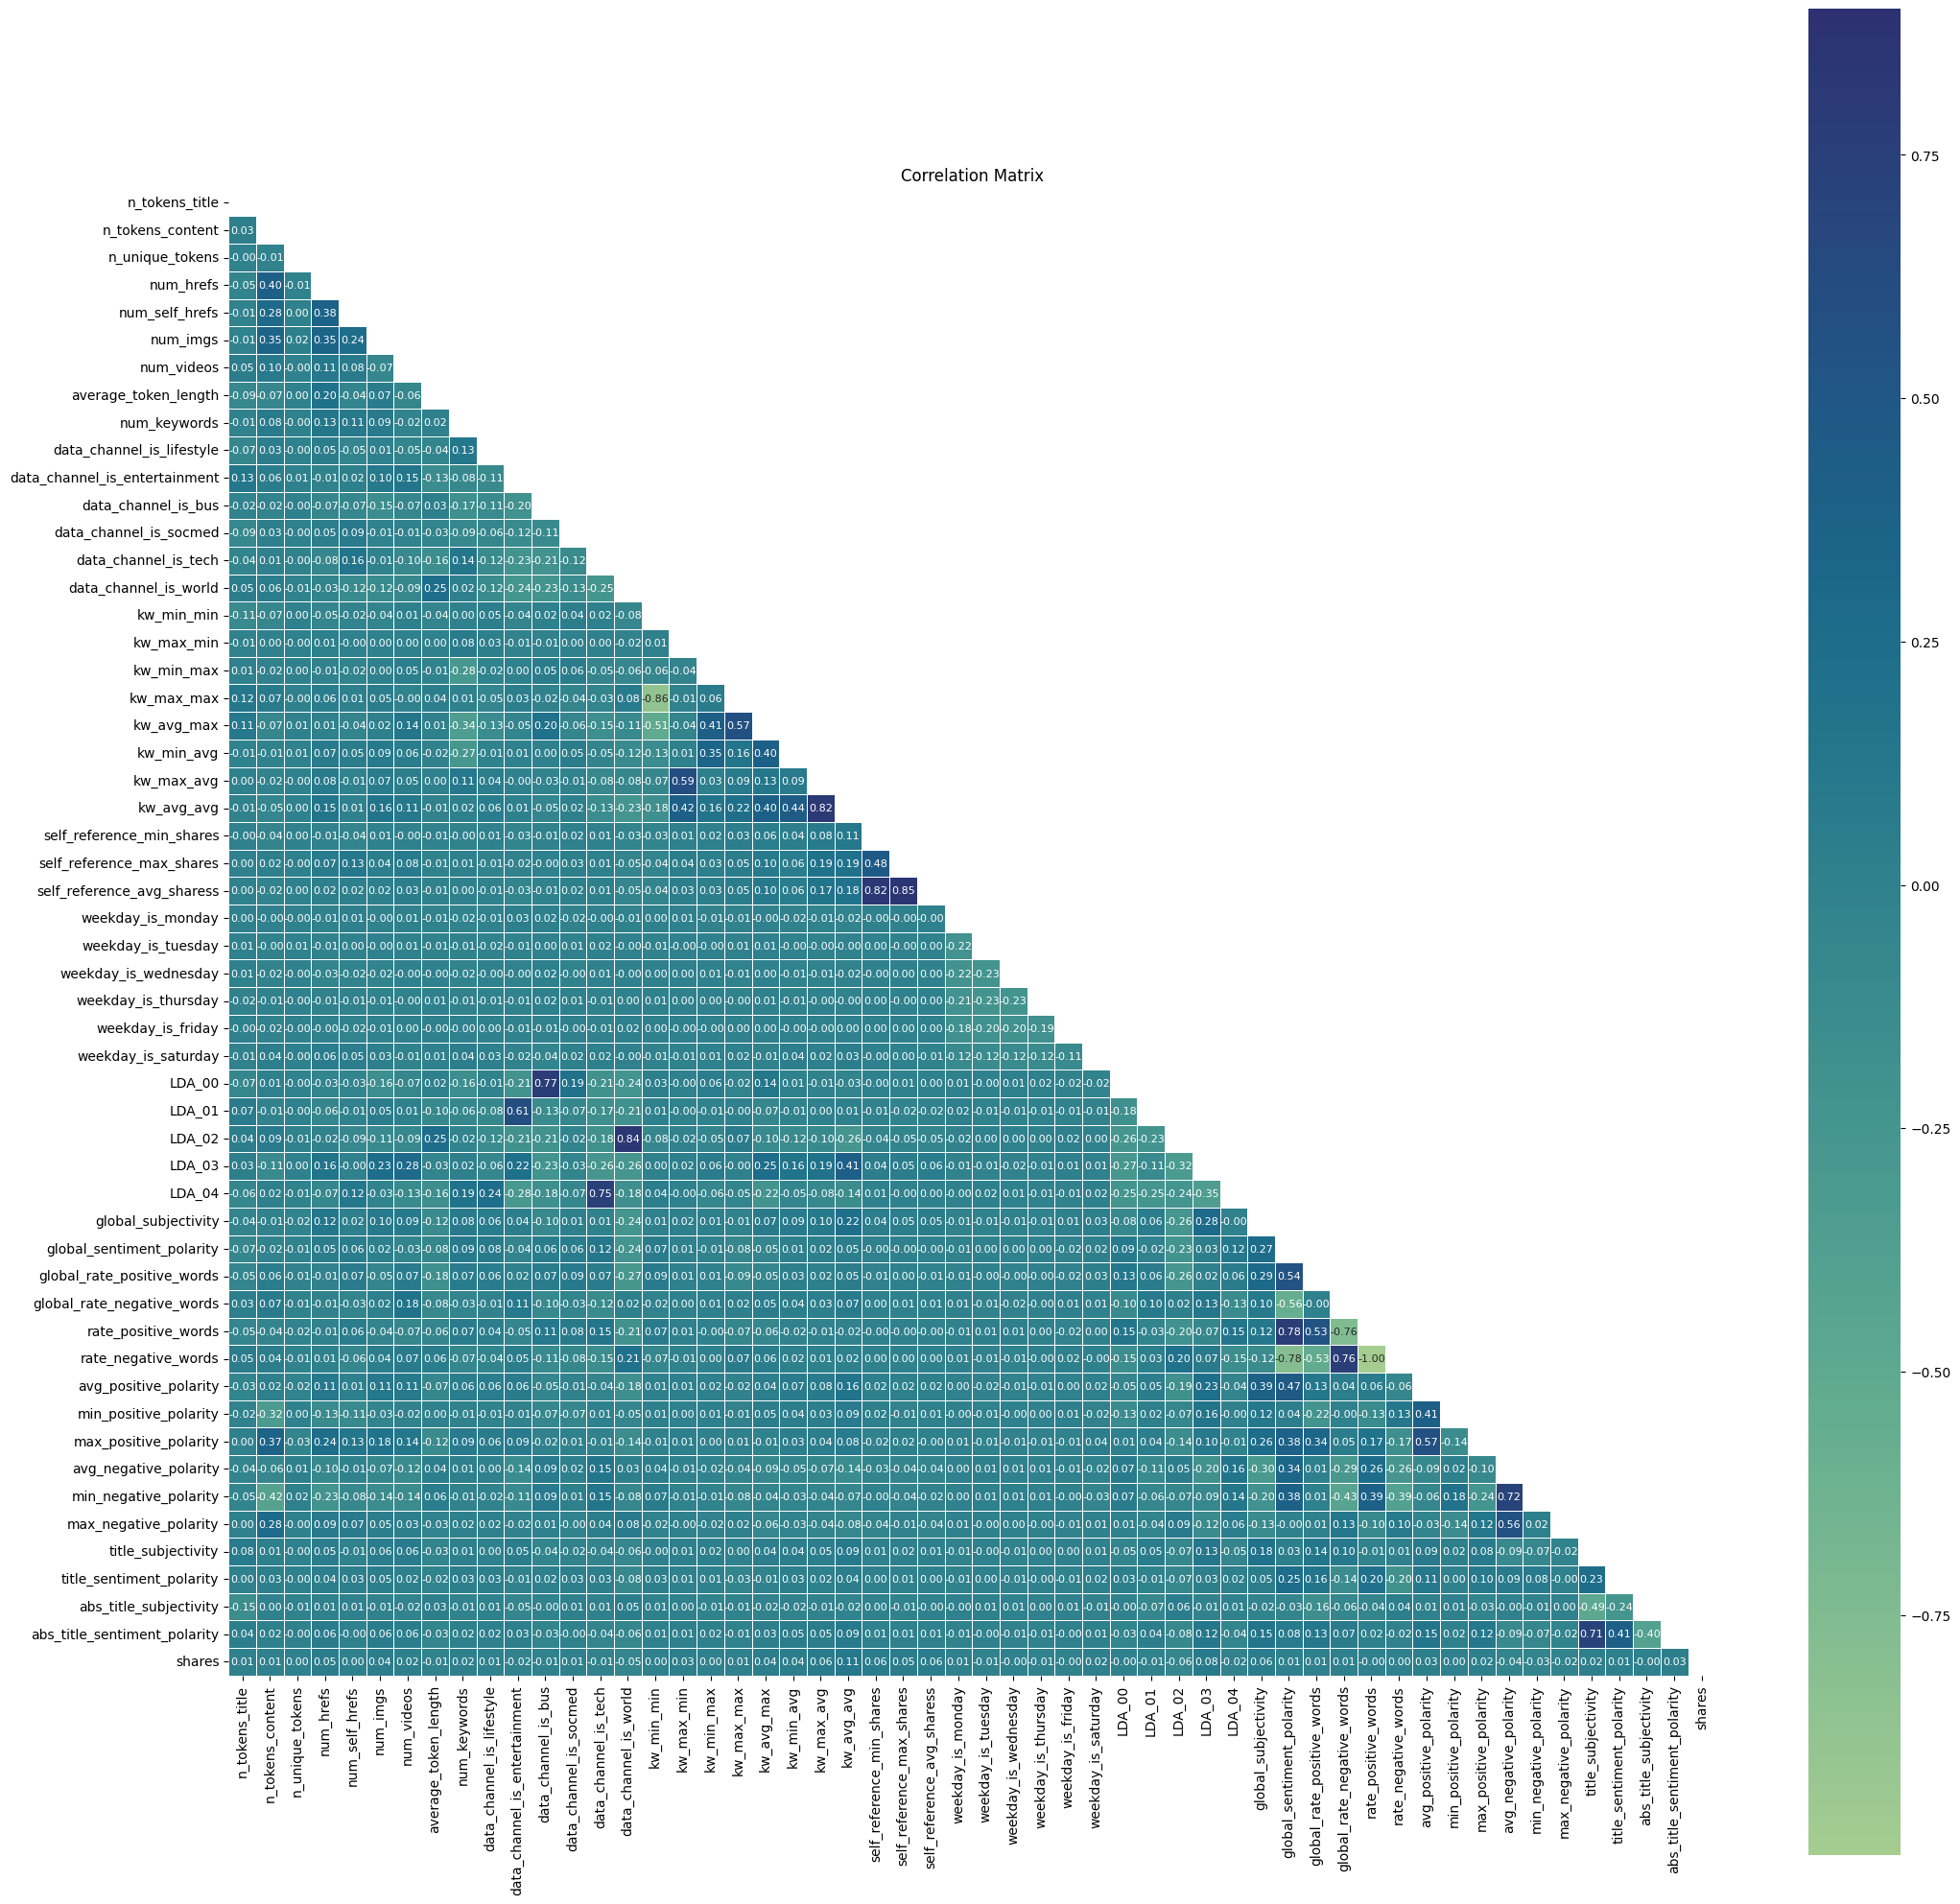

In [210]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(25, 25))

sns.heatmap(corr_matrix, mask=mask, vmax=.9, square=True, linewidths=.5, ax=ax, annot=True, annot_kws={"size": 8}, fmt=".2f", cmap="crest")

ax.set_title("Correlation Matrix")

plt.show()

In [211]:
corr_matrix2 = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

df2 = df.drop(to_drop, axis=1)
df2.sort_values('shares', inplace=True)
df2.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'LDA_00', 'LDA_01', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_pola

In [212]:
df2.shape

(38463, 51)

In [213]:
X, y = df2.drop(columns=['shares']), df2['shares']
X.shape, y.shape

((38463, 50), (38463,))

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [215]:
from xgboost import XGBRegressor
clf = XGBRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [216]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mean_absolute_error(y_test, y_pred)

3186.220385520957

In [217]:
mean_squared_error(y_test, y_pred,squared= False)

14885.611791712303

In [218]:
from sklearn.preprocessing import KBinsDiscretizer

kbin = KBinsDiscretizer(n_bins=3, encode='ordinal')
y = kbin.fit_transform(np.array(y).reshape(-1,1))
y.shape, y

((38463, 1),
 array([[0.],
        [0.],
        [0.],
        ...,
        [2.],
        [2.],
        [2.]]))

In [226]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix
from xgboost import XGBClassifier

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [223]:
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [224]:
print('Accuracy: %.2f'
      % accuracy_score(y_test, y_pred))

Accuracy: 0.49


In [225]:
confusion_matrix(y_test, y_pred)

array([[1377,  612,  426],
       [ 810,  972,  896],
       [ 468,  675, 1457]])